In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [4]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)

In [5]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [6]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
df = df.select_dtypes(exclude=['object'])

In [8]:
#Buscar nulos
df.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [9]:
#Borrado de datos nulos
df = df.dropna()
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


<Axes: >

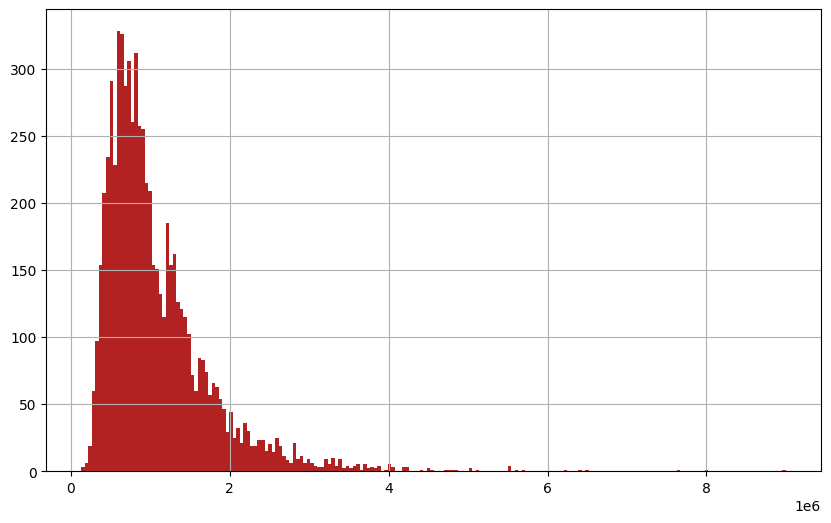

In [10]:
#Histograma
df.Price.hist(color='firebrick', bins=200, figsize=(10, 6))

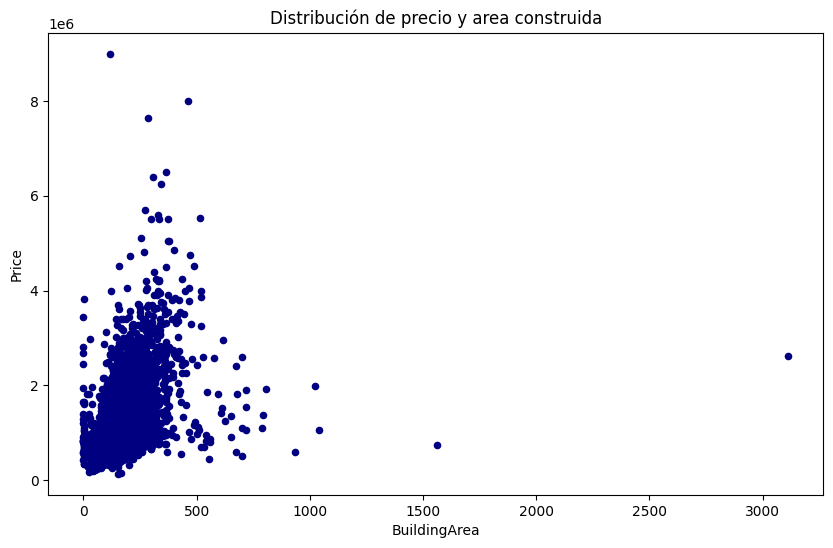

In [11]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [12]:
#Datos con área menor o igual a 800
df0 = df[df["BuildingArea"]<=800]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


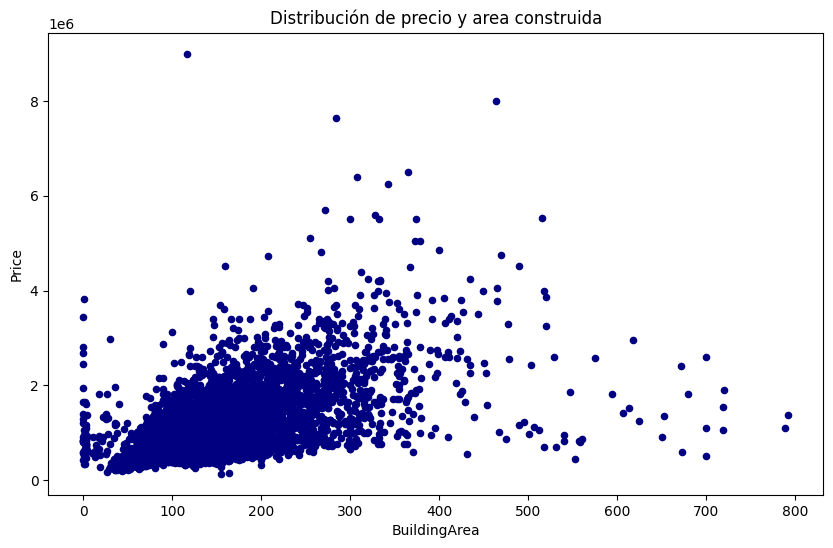

In [13]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [14]:
#Datos con área cero
dfzero = df0[df0["BuildingArea"]<=15]
len(dfzero)

56

In [15]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
df0 = df0[df0["BuildingArea"]>4]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [16]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
df0 = df0[(np.abs(zscore(df0['BuildingArea']))<=3)]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


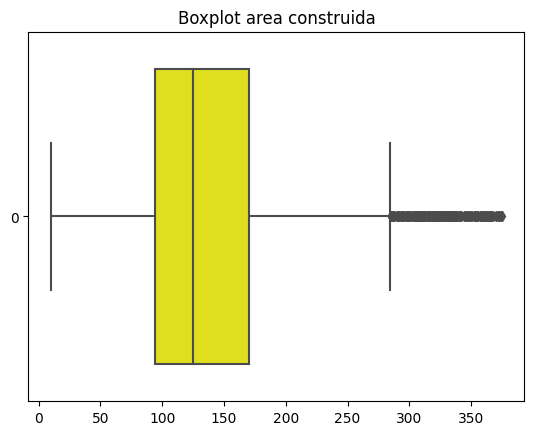

In [17]:
#Boxplot
ax = sb.boxplot(data=df0['BuildingArea'].values, orient='h', color='yellow')
ax.set_title('Boxplot area construida');
plt.show()

In [18]:
#Múltiples diagramas por parejas
#sb.set_theme(style="ticks")
#sb.pairplot(df0, hue='Rooms')

In [19]:
#Correlación entre variables
corr_test = pearsonr(x = df['BuildingArea'], y = df['Price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.5204915813803511
P-value:  0.0


<Axes: title={'center': 'Pearson Correlation of Features'}>

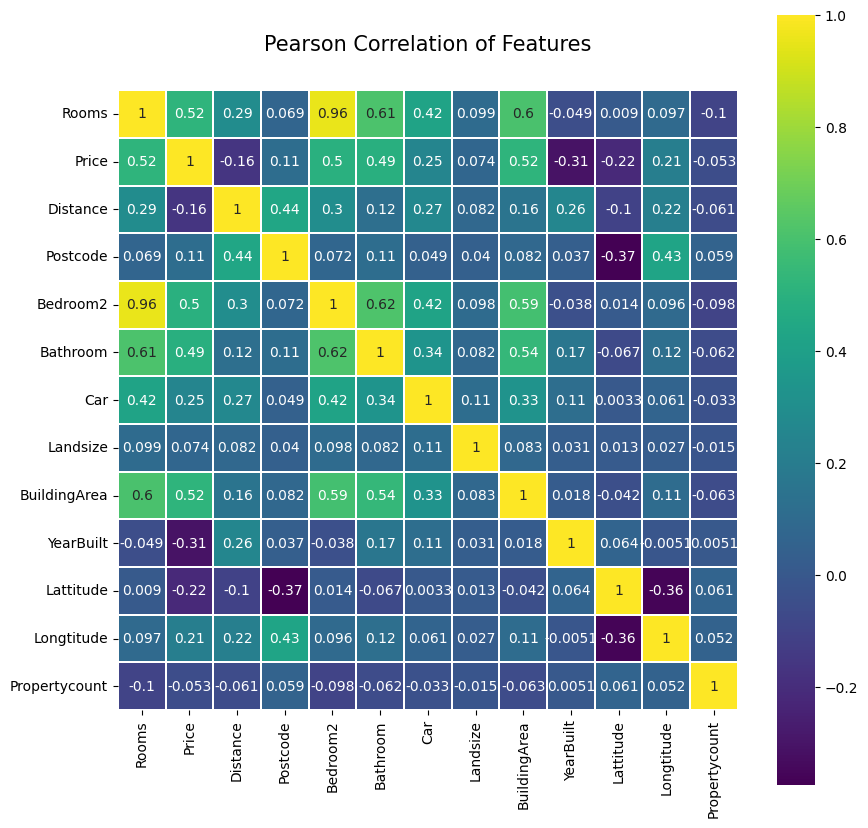

In [20]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [21]:
df0[df0["Landsize"]==0].count()

Rooms            1007
Price            1007
Distance         1007
Postcode         1007
Bedroom2         1007
Bathroom         1007
Car              1007
Landsize         1007
BuildingArea     1007
YearBuilt        1007
Lattitude        1007
Longtitude       1007
Propertycount    1007
dtype: int64

Text(0.5, 1.0, 'Distribución de precio y area construida')

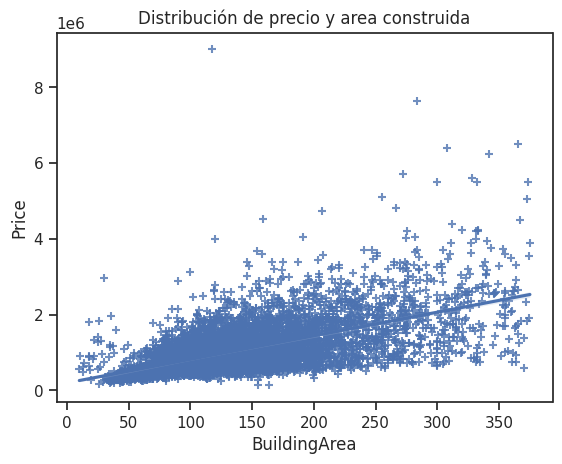

In [22]:
sb.set_theme(color_codes=True)
sb.set_theme(style="ticks")
ax = sb.regplot(x="BuildingArea", y="Price", data=df0, marker='+', x_jitter=0.2, y_jitter=0.2)
ax.set_title('Distribución de precio y area construida')

In [23]:
#sb.pairplot(df0, kind='reg')

In [24]:
#Regresión lineal (Area construida vs. Precio)
x = df0["BuildingArea"]
y = df0["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     4315.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:21:03   Log-Likelihood:                -97109.
No. Observations:                6678   AIC:                         1.942e+05
Df Residuals:                    6676   BIC:                         1.942e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.987e+05   1.45e+04     13.732   

In [25]:
df0 = df0.drop(['Bedroom2', 'Postcode', 'Lattitude', 'Longtitude'], axis=1)

In [26]:
df0.dtypes

Rooms              int64
Price            float64
Distance         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Propertycount    float64
dtype: object

In [27]:
#Regresión lineal múltiple
x = df0.iloc[:,[2,6,7]]
y = df0["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     2874.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:21:09   Log-Likelihood:                -96004.
No. Observations:                6678   AIC:                         1.920e+05
Df Residuals:                    6674   BIC:                         1.920e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.005e+07   2.79e+05     36.065   

In [28]:
#Predicciones con scikit-learn
train, test = train_test_split(df0, test_size = 0.20)
print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  5342
Ejemplos usados para test:  1336


In [29]:
#Regresión lineal múltiple
x = train.iloc[:,[2,6,7]]
y = train["Price"]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2276.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:21:14   Log-Likelihood:                -76866.
No. Observations:                5342   AIC:                         1.537e+05
Df Residuals:                    5338   BIC:                         1.538e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.002e+07   3.13e+05     32.025   

In [30]:
#Se definen las variables
x_train = train.iloc[:,[2,6,7]]
y_train = train.Price
x_test = test.iloc[:,[2,6,7]]
y_test = test.Price

In [31]:
#Entrenamiento del modelo
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [32]:
y_train

13533     937000.0
451       627500.0
4688      525500.0
11260     780000.0
3131     1420000.0
           ...    
11032     775000.0
11743     926000.0
3345     1210000.0
9643     1352000.0
10215     430000.0
Name: Price, Length: 5342, dtype: float64

In [33]:
#Predicción
y_pred = regr.predict(x_train)
y_pred

array([ 642831.41457235, 1054009.52086318,  517325.71595247, ...,
        993757.05647518, 1056870.3286177 ,  490360.51255856])

In [34]:
print('Coeficientes:\n', regr.coef_)
print("Error cuadrático medio (Mean squared error): %.2f" % mean_squared_error(y_true=y_train, y_pred=y_pred, squared=False))
print('Coef. determinación (r^2): %.2f' % r2_score(y_train, y_pred))
print('w = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))

Coeficientes:
 [-25481.28718211   6856.52279566  -4914.59107587]
Error cuadrático medio (Mean squared error): 429384.18
Coef. determinación (r^2): 0.56
w = [-25481.28718211   6856.52279566  -4914.59107587], b = 10022824.69596021


In [35]:
predicciones = regr.predict(x_train)
for y, y_pred in list(zip(y_train, predicciones)) [:10]:
    print("Valor real: {:.2f} - Valor estimado: {:.2f}".format(y, y_pred))

Valor real: 937000.00 - Valor estimado: 642831.41
Valor real: 627500.00 - Valor estimado: 1054009.52
Valor real: 525500.00 - Valor estimado: 517325.72
Valor real: 780000.00 - Valor estimado: 545168.67
Valor real: 1420000.00 - Valor estimado: 1357538.10
Valor real: 675000.00 - Valor estimado: 686112.23
Valor real: 630000.00 - Valor estimado: 658141.17
Valor real: 840000.00 - Valor estimado: 1000116.36
Valor real: 825000.00 - Valor estimado: 745594.14
Valor real: 1330000.00 - Valor estimado: 1163698.62


In [36]:
predicciones = regr.predict(X=x_test)
print(predicciones[0:10,])
rmse = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=False)
print(f"\nEl error (rmse) del test es: {rmse}")

[ 863494.53726506 1444379.086877    704803.02510601  726232.16139292
 2468143.70497691 1218845.29973296  671086.42345775 1117818.84585852
  429512.33053435  772586.09665732]

El error (rmse) del test es: 401441.29160440236


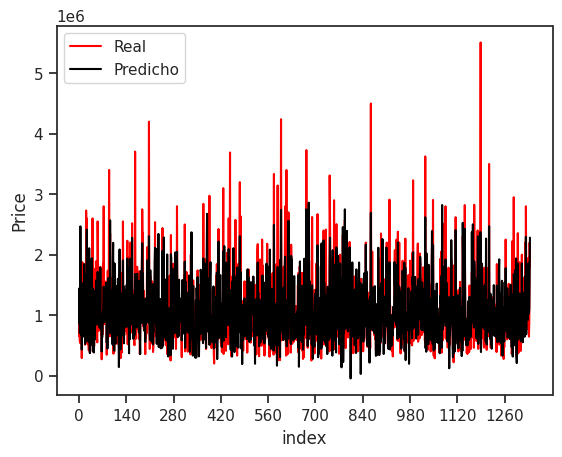

In [37]:
real = y_test
predicho = predicciones
index = np.arange(0, len(y_test), 1)
index = [str(x) for x in index]
plt.plot(index,real, label = 'Real', color = 'red')
plt.plot(index,predicho, label = 'Predicho', color = 'black')
plt.legend()
plt.xlabel("index")
plt.ylabel("Price")
plt.xticks(np.arange(0, len(y_test), 140))
plt.show()

In [38]:
#Coeficiente de correlacion
import scipy.stats
print("El coeficiente de correlación es: "+str(scipy.stats.pearsonr(real, predicho)[0]))

El coeficiente de correlación es: 0.7588014465286026
